In [ ]:
from google.colab import files

images = files.upload()

Saving DatasetZip.zip to DatasetZip.zip


In [ ]:
! ls -l

In [ ]:
! unzip DatasetZip.zip

In [ ]:
! ls -l /content/DatasetZip/training

total 36
drwxr-xr-x 2 root root 12288 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 12288 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 12288 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/testing

total 12
drwxr-xr-x 2 root root 4096 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 4096 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/validation

total 12
drwxr-xr-x 2 root root 4096 Mar  8 20:14 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  8 20:11 withmask
drwxr-xr-x 2 root root 4096 Mar  8 19:40 withoutmask


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
 
model1 = Sequential()
model1.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model1.add( MaxPool2D(3,3,) )
model1.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model1.add( Flatten() )
model1.add( Dense( 32, activation = 'relu' ) )
model1.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 42)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 28)        10612     
                                                                 
 flatten (Flatten)           (None, 188272)            0         
                                                                 
 dense (Dense)               (None, 32)                6024736   
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                        

In [ ]:
model1.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model1.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.3811
Epoch 1: val_accuracy improved from -inf to 0.43443, saving model to model1.hdf5
17/17 [==============================] - 51s 3s/step - loss: 1.0929 - accuracy: 0.3811 - val_loss: 1.0744 - val_accuracy: 0.4344
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0923 - accuracy: 0.4226
Epoch 2: val_accuracy did not improve from 0.43443
17/17 [==============================] - 48s 3s/step - loss: 1.0923 - accuracy: 0.4226 - val_loss: 1.0820 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0889 - accuracy: 0.4075
Epoch 3: val_accuracy did not improve from 0.43443
17/17 [==============================] - 49s 3s/step - loss: 1.0889 - accuracy: 0.4075 - val_loss: 1.0868 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0903 - accuracy: 0.4094
Epoch 4: val_accuracy did not improve from 0.43443
17/

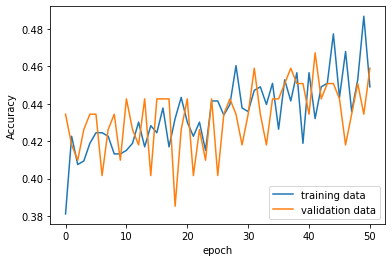

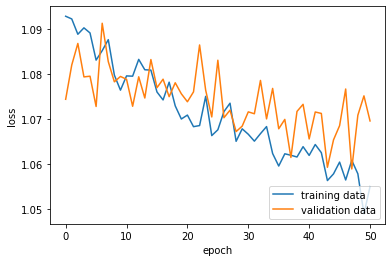

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=25,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.1,
    horizontal_flip=False,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:
from matplotlib.pyplot import imshow

In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


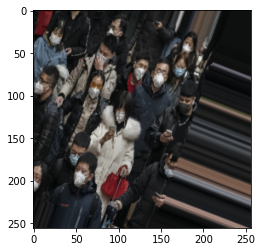

None


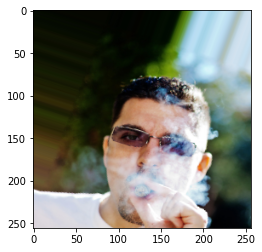

None


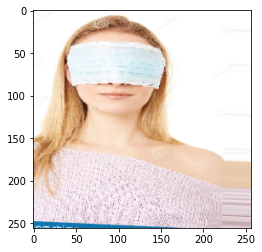

None


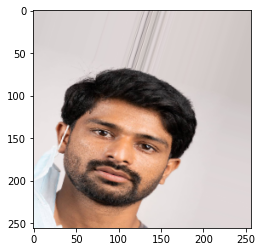

None


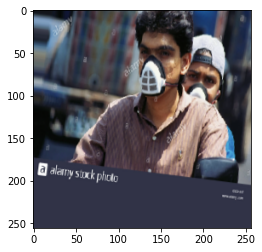

None


In [ ]:
for i in range(5):
  print(plt.show(imshow(np.asarray(imagesT[i]))))

In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


### **Best Model**

In [ ]:
model2=0

In [ ]:
 
model2 = Sequential()
model2.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model2.add( MaxPool2D(3,3,) )
model2.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model2.add( Flatten() )
model2.add( Dense( 32, activation = 'relu' ) )
model2.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 84, 84, 42)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 82, 82, 28)        10612     
                                                                 
 flatten_2 (Flatten)         (None, 188272)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                6024736   
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
model2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model2.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.5871 - accuracy: 0.3623
Epoch 1: val_accuracy improved from -inf to 0.41803, saving model to model2.hdf5
17/17 [==============================] - 50s 3s/step - loss: 1.5871 - accuracy: 0.3623 - val_loss: 1.0823 - val_accuracy: 0.4180
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0750 - accuracy: 0.4226
Epoch 2: val_accuracy did not improve from 0.41803
17/17 [==============================] - 49s 3s/step - loss: 1.0750 - accuracy: 0.4226 - val_loss: 1.0749 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0831 - accuracy: 0.4226
Epoch 3: val_accuracy did not improve from 0.41803
17/17 [==============================] - 48s 3s/step - loss: 1.0831 - accuracy: 0.4226 - val_loss: 1.0858 - val_accuracy: 0.4180
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.4226
Epoch 4: val_accuracy did not improve from 0.41803
17/

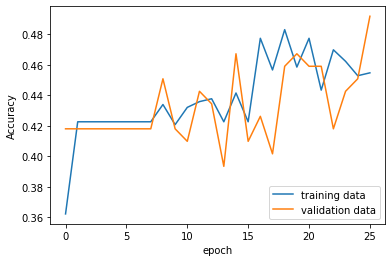

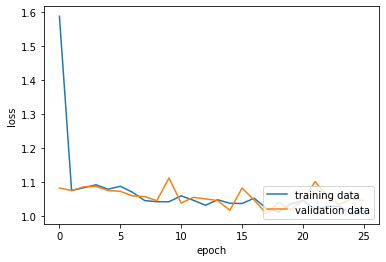

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
Y1 = [] # empty list of true labels
P1 = [] # empty list of predictions
for i in range(1):
   x, y = test_image_generator.next()
   p = model1.predict(x)
   Y1.extend(y)
   P1.extend(p)


In [ ]:
k = np.asarray(Y1)
P = np.asarray(P1)
y_pred = (P > 0.33)
accuracy1 = accuracy_score(k, y_pred)
accuracy1

0.375886524822695

In [ ]:
Y = [] # empty list of true labels
P = [] # empty list of predictions
for i in range(1):
   x, y = test_image_generator.next()
   p = model2.predict(x)
   Y.extend(y)
   P.extend(p)


In [ ]:
k = np.asarray(Y)
P = np.asarray(P)
y_pred = (P > 0.33)
accuracy = accuracy_score(k, y_pred)
accuracy

0.3475177304964539

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=60,
    width_shift_range=0.7,
    height_shift_range=0.7,
    shear_range=0.4,
    zoom_range=0.5,
    horizontal_flip=False,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


In [ ]:
model3=0

In [ ]:
 
model3 = Sequential()
model3.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model3.add( MaxPool2D(3,3,) )
model3.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model3.add( Flatten() )
model3.add( Dense( 32, activation = 'relu' ) )
model3.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 84, 84, 42)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 82, 82, 28)        10612     
                                                                 
 flatten_3 (Flatten)         (None, 188272)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                6024736   
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
model3.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model3.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model3.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.5240 - accuracy: 0.3925
Epoch 1: val_accuracy improved from -inf to 0.41803, saving model to model3.hdf5
17/17 [==============================] - 49s 3s/step - loss: 1.5240 - accuracy: 0.3925 - val_loss: 1.0994 - val_accuracy: 0.4180
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0957 - accuracy: 0.4170
Epoch 2: val_accuracy did not improve from 0.41803
17/17 [==============================] - 48s 3s/step - loss: 1.0957 - accuracy: 0.4170 - val_loss: 1.0909 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0903 - accuracy: 0.4226
Epoch 3: val_accuracy did not improve from 0.41803
17/17 [==============================] - 48s 3s/step - loss: 1.0903 - accuracy: 0.4226 - val_loss: 1.1368 - val_accuracy: 0.4180
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.4057
Epoch 4: val_accuracy did not improve from 0.41803
17/

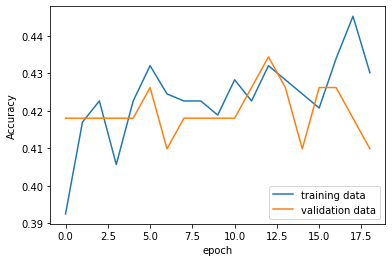

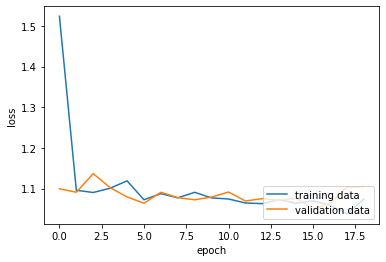

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


In [ ]:
model4=0

In [ ]:
 
model4 = Sequential()
model4.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model4.add( MaxPool2D(3,3,) )
model4.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model4.add( Flatten() )
model4.add( Dense( 32, activation = 'relu' ) )
model4.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 84, 84, 42)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 82, 82, 28)        10612     
                                                                 
 flatten_5 (Flatten)         (None, 188272)            0         
                                                                 
 dense_10 (Dense)            (None, 32)                6024736   
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                      

In [ ]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model4.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model4.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.2753 - accuracy: 0.4113
Epoch 1: val_accuracy improved from -inf to 0.45902, saving model to model4.hdf5
17/17 [==============================] - 50s 3s/step - loss: 1.2753 - accuracy: 0.4113 - val_loss: 1.0596 - val_accuracy: 0.4590
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0735 - accuracy: 0.4132
Epoch 2: val_accuracy did not improve from 0.45902
17/17 [==============================] - 48s 3s/step - loss: 1.0735 - accuracy: 0.4132 - val_loss: 1.0639 - val_accuracy: 0.4262
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0474 - accuracy: 0.4491
Epoch 3: val_accuracy did not improve from 0.45902
17/17 [==============================] - 47s 3s/step - loss: 1.0474 - accuracy: 0.4491 - val_loss: 1.0278 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0205 - accuracy: 0.4396
Epoch 4: val_accuracy did not improve from 0.45902
17/

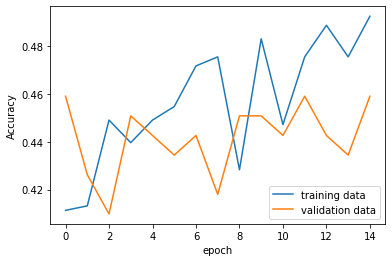

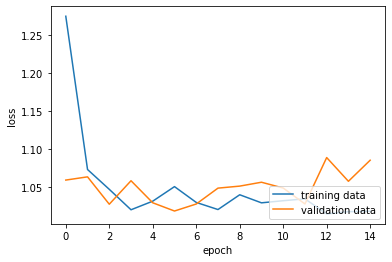

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

### **Custom Function for calculating predictions**

In [ ]:
def acc_score(k, pred):
  index = 0
  y_pred = []
  for label, p in zip(k,pred):
    temp_list = [False, False, False]
    if(np.argmax(label)== np.argmax(p)):
      temp_list[np.argmax(label)] = True
    y_pred.append(temp_list)
  return y_pred


    

In [ ]:
Y1 = [] # empty list of true labels
Y2 = []
Y3 = []
Y4 = []
P1 = []# empty list of predictions
P2 = []
P3 = []
P4 = []
model1.load_weights('model1.hdf5')
model2.load_weights('model2.hdf5')
model3.load_weights('model3.hdf5')
model4.load_weights('model4.hdf5')

for i in range(1):
   x, y = test_image_generator.next()
   p1 = model1.predict(x)
   P1.extend(p1)
   Y1.extend(y)
   #p=0



In [ ]:
for i in range(1):
   x, y = test_image_generator.next()
   p2 = model2.predict(x)
   P2.extend(p2)
   Y2.extend(y)

In [ ]:
for i in range(1):
   x, y = test_image_generator.next()
   p3 = model3.predict(x)
   P3.extend(p3)
   Y3.extend(y)

In [ ]:
for i in range(1):
   x, y = test_image_generator.next()
   p4 = model4.predict(x)
   P4.extend(p4)
   Y4.extend(y)

In [ ]:
k1 = np.asarray(Y1)
k2 = np.asarray(Y2)
k3 = np.asarray(Y3)
k4 = np.asarray(Y4)
p1 = np.asarray(P1)
p2 = np.asarray(P2)
p3 = np.asarray(P2)
p4 = np.asarray(P2)
y_pred1 = acc_score(k1,p1)
y_pred2 = acc_score(k2,p2)
y_pred3 = acc_score(k3,p3)
y_pred4 = acc_score(k4,p4)
accuracy1 = accuracy_score(k1, y_pred1)
accuracy2 = accuracy_score(k2, y_pred2)
accuracy3 = accuracy_score(k3, y_pred3)
accuracy4 = accuracy_score(k4, y_pred4)

### **Model Accuracy**

In [ ]:
print("Model-1", accuracy1*100)
print("Model-2", accuracy2*100)
print("Model-3", accuracy3*100)
print("Model-4", accuracy4*100)

Model-1 43.97163120567376
Model-2 46.09929078014184
Model-3 34.751773049645394
Model-4 43.97163120567376
